Let's assume that you have recorded the diameters and prices of pizzas that you have
previously eaten in your pizza journal. These observations comprise our training data:

Training instance | Diameter in inches | Price in dollars:

1 | 6 | 7

2 | 8 | 9

3 | 10 | 13

4 | 14 | 17.5

5 | 18 | 18

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X reprsents the features of our training data, the diameter of the pizzas.

y is the vector representing the prices of the pizzas.

In [3]:
X = np.array([[6], [8], [10], [14], [18]])
print(X)
X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
print(X)
y = [7, 9, 13, 17.5, 18]

[[ 6]
 [ 8]
 [10]
 [14]
 [18]]
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]


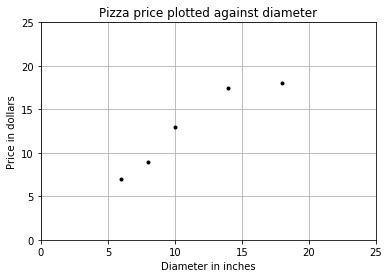

In [7]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

Implementing Linear Regression on the Data

In [12]:
# import the library corresponding to Linear Regression
from sklearn.linear_model import LinearRegression

# create the instance of the estimator
model = LinearRegression()

# fit the model on the training data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# Predict the pricing of a pizza for which the diameter has never been seen before
test_pizza = np.array([[12]])
predicted_price = model.predict(test_pizza)[0]
print('A 12" pizza should cost: $%.2f' %predicted_price)

A 12" pizza should cost: $13.68


Calculating RSS (Residual Sum of Squares) cost function value for our model:

In [15]:
print('Residual sum of squares: %.2f' % np.mean((model.predict(X) - y) ** 2))

Residual sum of squares: 1.75


Solving for OLS (Ordinary Least Square) for simple linear regression

In [16]:
# Calculating variance
import numpy as np

X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
# calculating the x mean or x_bar value
x_bar = X.mean()
print(x_bar)

# Calculating variance
# Note that we substract one from the number of training instances when calculating the sample variance.
# This is called Bessel's correction. It corrects the bias in the estimation of the population variance from a sample.
variance = ((X - x_bar) ** 2).sum() / (X.shape[0] - 1)
print(variance)

11.2
23.2


In [17]:
# using Numpy to calculate variance with ddof set to 1 for Bessel's correction
print(np.var(X, ddof=1))

23.2


Covariance:

It is a measure of how much the two variables change together.
- If the variables increase together, their covariance is positive
- If one variable tends to increase while the other decreases, their covariance is negative

In [22]:
# Calculating covariance.
# For this we need to define y again

y = np.array([7, 9, 13, 17.5, 18])
y_bar = y.mean()
print(y_bar)

12.9


In [21]:
# We need to use a transpose of X in order for the matrix multiplication to work
covariance = (np.multiply((X - x_bar).transpose(), y - y_bar).sum()) / (X.shape[0] - 1)
print(covariance)

# alternatively, calculating using the built in covariance function
print(np.cov(X.transpose(), y)[0][1])

22.65
22.650000000000002


Solving for alpha and beta for the linear regression example:

y_bar = alpha + beta(x_bar)

and 

beta = cov(x,y) / var(x)

Implies:

beta = 22.65 / 23.2 ~= 0.98

Hence,

alpha = y_bar - beta(x_bar) = 12.9 - 0.98 * 11.2 ~= 1.97

# R-squared or Coefficient of determination

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [68]:
# X_train = np.array([[6], [8], [10], [14], [18]])
# print(X_train)
X_train = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
# print(X_train)
y_train = np.array([7, 9, 13, 17.5, 18])

# X_test = np.array([[8], [9], [11], [16], [12]])
# print(X_test)
X_test = np.array([[8], [9], [11], [16], [12]]).reshape(-1, 1)
# print(X_test)
y_test = np.array([11, 8.5, 15, 18, 11])

model = LinearRegression()
model.fit(X_train, y_train)

# The score method of LinearRegression returns the model's R-squared value
r_squared = model.score(X_test, y_test)
print(r_squared)

0.6620052929422553


# Classification with KNN

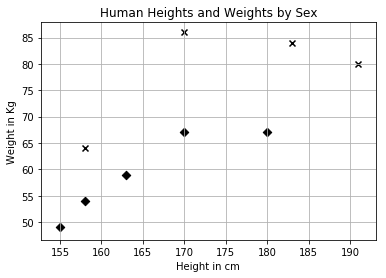

In [72]:
# Applying KNN to a binary classification problem. The response variable can take two values - male, female. 
# The data is height and weight records of individuals - the feature set

import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in Kg')

for i, x in enumerate(X_train):
    # use cross markers for instaces that are male and diamond markers for instances that are female.
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
    
plt.grid(True)
plt.show()

Euclidean Distance between the training values and a sample test value [155, 70]

In [73]:
x = np.array([[155, 70]])
distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
print(distances)

[ 6.70820393 21.9317122  31.30495168 37.36308338 21.         13.60147051
 25.17935662 16.2788206  15.29705854]


In [74]:
nearest_neighbor_indices = distances.argsort()[:3]
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
print(nearest_neighbor_genders)

['male' 'female' 'female']


In [75]:
from collections import Counter
b = Counter(np.take(y_train, distances.argsort()[:3]))
b.most_common(1)[0][0]

'female'

<b>KNN classifier implementation using scikit-learn</b>

In [76]:
# LabelBinarizer converts strings to binary/integer
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

In [80]:
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
print(y_train_binarized)
# print(y_train_binarized.reshape(-1))

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [35]:
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train_binarized.reshape(-1))
prediction_binarized = clf.predict(np.array([155, 70]).reshape(1, -1))[0]
predicted_label = lb.inverse_transform(prediction_binarized)
print(predicted_label)

['female']


In [37]:
X_test = np.array([
    [168, 65],
    [180, 96],
    [160, 52],
    [169, 67]
])
y_test = ['male', 'male', 'female', 'female']
y_test_binarized = lb.transform(y_test)
print('Binarized labels: %s' %y_test_binarized.T[0])
predictions_binarized = clf.predict(X_test)
print('Binarized predictions: %s' %predictions_binarized)
print('Predicted labels: %s' %lb.inverse_transform(predictions_binarized))

Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


# Model Evaluation

- Accuracy

In [39]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized, predictions_binarized))

Accuracy: 0.75


- Precision

In [40]:
from sklearn.metrics import precision_score
print('Precision: %s' % precision_score(y_test_binarized, predictions_binarized))

Precision: 1.0


- Recall

In [42]:
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized, predictions_binarized))

Recall: 0.5


- F1 Score = F1 Score summarizes precision and recall with a single statistic.

In [44]:
from sklearn.metrics import f1_score
print('F1 Score: %s' % f1_score(y_test_binarized, predictions_binarized))

F1 Score: 0.6666666666666666


"The arithmatic mean of the precision and recall scores is the upper bound of the F1 score. The F1 score penalizes classifiers more as the difference between their precision and recall scores increases."

- Matthews Correlation Coefficient (MCC) - It is an alternative to the F1 score for measuring the performance of binary classifiers. A perfect classifier's MCC is 1.

In [45]:
from sklearn.metrics import matthews_corrcoef
print('Matthews correlation coefficient: %s' % matthews_corrcoef(y_test_binarized, predictions_binarized))

Matthews correlation coefficient: 0.5773502691896258


- classification_report - This is a convenience function provided by scikit-learn that reports precision, recall and F1 score:

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, predictions_binarized, target_names=['male'], labels=[1]))

             precision    recall  f1-score   support

       male       1.00      0.50      0.67         2

avg / total       1.00      0.50      0.67         2



# Regression with KNN

In [8]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])

y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])
y_test = [65, 96, 52, 67]

k = 3
clf = KNeighborsRegressor(n_neighbors=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Predicted Weights: %s' %predictions)
print('Coefficient of determination: %s' %r2_score(y_test, predictions))
print('Mean absolute error: %s' %mean_absolute_error(y_test, predictions))
print('Mean squared error: %s' %mean_squared_error(y_test, predictions))
print('Root mean squared error: %s' %np.sqrt(mean_squared_error(y_test, predictions)))

Predicted Weights: [70.66666667 79.         59.         70.66666667]
Coefficient of determination: 0.6290565226735438
Mean absolute error: 8.333333333333336
Mean squared error: 95.8888888888889
Root mean squared error: 9.792287214378922


Scaling Features

In [61]:
from scipy.spatial.distance import euclidean

# heights in millimeters
X_train = np.array([
    [1700, 1],
    [1600, 0]
])
x_test = np.array([1640, 1]).reshape(1, -1)
# print(x_test)
print(euclidean(X_train[0,:], x_test))
print(euclidean(X_train[1,:], x_test))


# heights in meters
X_train = np.array([
    [1.7, 1],
    [1.6, 0]
])
x_test = np.array([164, 1]).reshape(1, -1)
# print(x_test)
print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))

60.0
40.01249804748511
162.3
162.40307878855006


- Standard Scaler:
It is a transformer that scales features so that they have unit variance

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])

y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])
y_test = [65, 96, 52, 67]

X_train_scaled = ss.fit_transform(X_train)

print(X_train)
print(X_train_scaled)

[[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [170   0]]
[[-0.9908706   1.11803399]
 [ 0.01869567  1.11803399]
 [ 1.11239246  1.11803399]
 [ 1.78543664  1.11803399]
 [-1.24326216 -0.89442719]
 [-0.57021798 -0.89442719]
 [ 0.86000089 -0.89442719]
 [-0.9908706  -0.89442719]
 [ 0.01869567 -0.89442719]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
X_test_scaled = ss.transform(X_test)

clf.fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)
print('Predicted weigths: %s' %predictions)
print('Coefficient of determination: %s' %r2_score(y_test, predictions))
print('Mean absolute error: %s' %mean_absolute_error(y_test, predictions))
print('Mean squared error: %s' %mean_squared_error(y_test, predictions))
print('Root mean squared error: %s' %np.sqrt(mean_squared_error(y_test, predictions)))

Predicted weigths: [78.         83.33333333 54.         64.33333333]
Coefficient of determination: 0.6706425961745109
Mean absolute error: 7.583333333333336
Mean squared error: 85.13888888888893
Root mean squared error: 9.227073690444275


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Feature Extraction

<b>One-hot-encoding</b>

In [12]:
# scikit-learn's DictVectorizer class is a transformer that can be used to one-hot encode categorical features
from sklearn.feature_extraction import DictVectorizer
onehot_encoder = DictVectorizer()
X = [
    {'city': 'New York'},
    {'city': 'San Francisco'},
    {'city': 'Chapel Hill'}
]
# print(onehot_encoder.fit_transform(X))
print(onehot_encoder.fit_transform(X).toarray())

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [86]:
from sklearn import preprocessing
import numpy as np
X = np.array([
    [0., 0., 5., 13., 9., 1.],
    [0., 0., 13., 15., 10., 15.],
    [0., 3., 15., 2., 0., 11.]
])
print(preprocessing.scale(X))

[[ 0.         -0.70710678 -1.38873015  0.52489066  0.59299945 -1.35873244]
 [ 0.         -0.70710678  0.46291005  0.87481777  0.81537425  1.01904933]
 [ 0.          1.41421356  0.9258201  -1.39970842 -1.4083737   0.33968311]]


<b>Extracting features from text - Bag-of-words Model</b>

In [14]:
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game'
]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
print(vectorizer.fit_transform(corpus))
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

  (0, 0)	1
  (0, 3)	1
  (0, 1)	1
  (0, 5)	1
  (0, 7)	1
  (1, 2)	1
  (1, 6)	1
  (1, 4)	1
  (1, 0)	1
  (1, 1)	1
[[1 1 0 1 0 1 0 1]
 [1 1 1 0 1 0 1 0]]
{'unc': 7, 'played': 5, 'duke': 1, 'in': 3, 'basketball': 0, 'lost': 4, 'the': 6, 'game': 2}


In [89]:
corpus.append('I ate a sandwitch')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
{'unc': 9, 'played': 6, 'duke': 2, 'in': 4, 'basketball': 1, 'lost': 5, 'the': 8, 'game': 3, 'ate': 0, 'sandwitch': 7}


In [91]:
from sklearn.metrics.pairwise import euclidean_distances
X = vectorizer.fit_transform(corpus).todense()
print('Distance between 1st and 2nd documents:', euclidean_distances(X[0], X[1]))
print('Distance between 1st and 3rd documents:', euclidean_distances(X[0], X[2]))
print('Distance between 2nd and 3rd documents:', euclidean_distances(X[1], X[2]))

Distance between 1st and 2nd documents: [[2.44948974]]
Distance between 1st and 3rd documents: [[2.64575131]]
Distance between 2nd and 3rd documents: [[2.64575131]]


Stop word filtering - This is to filter out the words that are most common of the documents in the corpus. Eg: the, an, a, do, be, will, on, around etc

In [93]:
vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0]]
{'unc': 7, 'played': 5, 'duke': 2, 'basketball': 1, 'lost': 4, 'game': 3, 'ate': 0, 'sandwitch': 6}


# Stemming and lemmatization

In [95]:
corpus = [
    'He ate the sandwitches',
    'Every sandwitch was eaten by him'
]
vectorizer = CountVectorizer(binary=True, stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[1 0 0 1]
 [0 1 1 0]]
{'ate': 0, 'sandwitches': 3, 'sandwitch': 2, 'eaten': 1}


In [101]:
corpus = [
    'I am gathering ingredients for the sandwitch.',
    'There were many wizards at the gathering.'
]
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anshul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [102]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('gathering', 'v'))
print(lemmatizer.lemmatize('gathering', 'n'))

gather
gathering


Comparing Lemmatization with Stemming

In [107]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('gathering'))

gather


In [108]:
import nltk
# nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anshul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [109]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

wordnet_tags = ['n', 'v']
corpus = [
    'He ate the sandwitches',
    'Every sandwitch was eaten by him'
]
stemmer = PorterStemmer()
print('Stemmed: ', [[stemmer.stem(token) for token in word_tokenize(document)] for document in corpus])

def lemmatize(token, tag):
    if tag[0].lower() in ['n', 'v']:
        return lemmatizer.lemmatize(token, tag[0].lower())
    return token

lemmatizer = WordNetLemmatizer()
tagged_corpus = [pos_tag(word_tokenize(document)) for document in corpus]
print('Lemmatized: ', [[lemmatize(token, tag) for token, tag in document] for document in tagged_corpus])

Stemmed:  [['He', 'ate', 'the', 'sandwitch'], ['everi', 'sandwitch', 'wa', 'eaten', 'by', 'him']]
Lemmatized:  [['He', 'eat', 'the', 'sandwitches'], ['Every', 'sandwitch', 'be', 'eat', 'by', 'him']]


# Extending bag-of-words with tf-idf weights

In [17]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'The dog ate a sandwitch, the wizard transfigured a sandwitch, and I ate a sandwitch'
]
vectorizer = CountVectorizer(stop_words='english')
frequencies = np.array(vectorizer.fit_transform(corpus).todense())[0]
print(frequencies)
print('Token indices: ', vectorizer.vocabulary_)
for token, index in vectorizer.vocabulary_.items():
    print('The token "%s" appears %s times.' %(token, frequencies[index]))

[2 1 3 1 1]
Token indices:  {'dog': 1, 'ate': 0, 'sandwitch': 2, 'wizard': 4, 'transfigured': 3}
The token "dog" appears 1 times.
The token "ate" appears 2 times.
The token "sandwitch" appears 3 times.
The token "wizard" appears 1 times.
The token "transfigured" appears 1 times.


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus=[
    'The dog ate a sandwitch and I ate a sandwitch',
    'The wizard transfigured a sandwitch'
]
vectorizer = TfidfVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())

[[0.75458397 0.37729199 0.53689271 0.         0.        ]
 [0.         0.         0.44943642 0.6316672  0.6316672 ]]


# Multiple Linear Regression 

- Multivariate linear regression is represented by the following matrix equation:
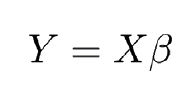

- And the corresponding value for the coefficient (beta) is represented by the equation:
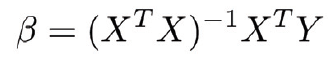
We can solve for beta using NumPy as follows:

In [20]:
from numpy.linalg import inv
from numpy import dot, transpose
 
# An additional variable beta(0) with all the values as 1 is passed for the matrix multiplication to proceed
X = [
    [1, 6, 2],
    [1, 8, 1],
    [1, 10, 0],
    [1, 14, 2],
    [1, 18, 0]    
]
y = [
    [7],
    [9],
    [13],
    [17.5],
    [18]
]
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [23]:
# Alternatively
from numpy.linalg import lstsq

print(lstsq(X, y, rcond=None)[0])

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [26]:
# Updating the pizza price predictor application to use the 2nd explanatory variable - toppings
from sklearn.linear_model import LinearRegression

X = [
    [6, 2],
    [8, 1],
    [10, 0],
    [14, 2],
    [18, 0]    
]
y = [
    [7],
    [9],
    [13],
    [17.5],
    [18]
]

model = LinearRegression()
model.fit(X, y)
X_test = [
    [8, 2],
    [9, 0],
    [11, 2],
    [16, 2],
    [12, 0]    
]
y_test = [
    [11],
    [8.5],
    [15],
    [18],
    [11]
]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Actual: ', y_test[i])
    print('Predicted: ', prediction)

print('R-Squared: %.2f' %model.score(X_test, y_test))

Actual:  [11]
Predicted:  [10.0625]
Actual:  [8.5]
Predicted:  [10.28125]
Actual:  [15]
Predicted:  [13.09375]
Actual:  [18]
Predicted:  [18.14583333]
Actual:  [11]
Predicted:  [13.3125]
R-Squared: 0.77


# Polynomial Regression

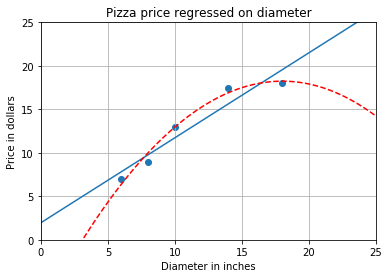

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
Simple linear regression r-squared: 0.809726797707665
Simple linear regression r-squared: 0.8675443656345054


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train = [
    [6], [8], [10], [14], [18]
]
y_train = [
    [7], [9], [13], [17.5], [18]
]
X_test = [
    [6], [8], [11], [16]
]
y_test = [
    [8], [12], [15], [18]
]

regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))

plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('Simple linear regression r-squared:', regressor.score(X_test, y_test))
print('Simple linear regression r-squared:', regressor_quadratic.score(X_test_quadratic, y_test))


# Applying Linear Regression
The Wine Dataset - https://archive.ics.uci.edu/ml/datasets/wine

In [34]:
import pandas as pd

df = pd.read_csv("C:\\Users\\anshul\\winequality-red.csv", sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


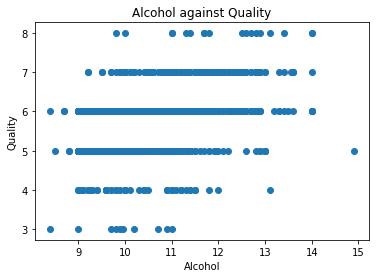

In [38]:
# import matplotlib.pylab as plt #alternatively
import matplotlib.pyplot as plt

plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol against Quality')
plt.show()

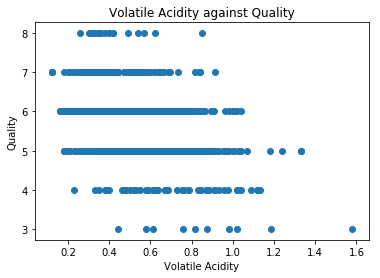

In [39]:
# import matplotlib.pylab as plt #alternatively
import matplotlib.pyplot as plt

plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Volatile Acidity against Quality')
plt.show()

<b>Fitting and evaluating the model</b>

In [50]:
from sklearn.linear_model import LinearRegression
import pandas as pd
# import matplotlib.pylab as plt #alternatively
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("C:\\Users\\anshul\\winequality-red.csv", sep=';')
# display(df.head(n=5))
X = df.drop('quality', axis = 1)
# display(X.head(n=5))
# X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared: ', regressor.score(X_test, y_test))

R-squared:  0.2954154073737232


Using cross validation to get the best of the R-squared scores

In [52]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv("C:\\Users\\anshul\\winequality-red.csv", sep=';')
X = df.drop('quality', axis = 1)
y = df['quality']

regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
print('Mean Score: ', scores.mean())
print('Scores: \n', scores)


Mean Score:  0.2900416288421962
Scores: 
 [0.13200871 0.31858135 0.34955348 0.369145   0.2809196 ]


# Gradient Descent

In [55]:
import numpy as np
# boston dataset from scikit-learn
from sklearn.datasets import load_boston
# stochastic gradient descent
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))

X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test.reshape(-1, 1))

regressor = SGDRegressor(loss='squared_loss')
scores=cross_val_score(regressor, X_train, y_train, cv=5)

print('R-squared Cross Validation: ', scores)
print('R-squared Mean Cross Validation: ', np.mean(scores))

regressor.fit(X_train, y_train)
print('R-squared Test Set Score: ', regressor.score(X_test, y_test))

R-squared Cross Validation:  [0.70342389 0.72484463 0.68114233 0.75648548 0.65743708]
R-squared Mean Cross Validation:  0.7046666825475166
R-squared Test Set Score:  0.727977721183514


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, t

# Binary Classification with Logistic Regression
- Spam Filtering

In [70]:
import pandas as pd
df = pd.read_csv("C:\\Users\\anshul\\SMSSpamCollection.csv", delimiter='\t', header=None) #delimiter='\t', , header=None
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [71]:
print('Number of spam messages: %s' %df[df[0] == 'spam'][0].count())
print('Number of ham messages: %s' %df[df[0] == 'ham'][0].count())

Number of spam messages: 747
Number of ham messages: 4825


In [75]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

X = df[1].values
y = df[0].values
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
for i, prediction in enumerate(predictions[:5]):
    print('\nPredicted: ', prediction)
    print('Message: ', X_test_raw[i])


Predicted:  ham
Message:  I thk u dun haf 2 hint in e forum already lor... Cos i told ron n darren is going 2 tell shuhui.

Predicted:  ham
Message:  Ah you see. You have to be in the lingo. I will let you know wot on earth it is when has finished making it!

Predicted:  ham
Message:  Yup. Wun believe wat? U really neva c e msg i sent shuhui?

Predicted:  ham
Message:  K, my roommate also wants a dubsack and another friend may also want some so plan on bringing extra, I'll tell you when they know for sure

Predicted:  ham
Message:  U sleeping now.. Or you going to take? Haha.. I got spys wat.. Me online checking n replying mails lor..


<b>Binary Classification Performance Metrics</b>

[[4 1]
 [2 3]]


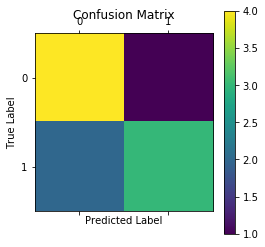

In [87]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plt.matshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

- Accuracy

In [18]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc

# df = pd.read_csv("C:\\Users\\anshul\\sms.csv", delimiter='\t', header=None)
# print(df.head())
df = pd.read_csv("C:\\Users\\anshul\\sms.csv")

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'], random_state=11)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

scores = cross_val_score(classifier, X_train, y_train, cv=5)
print('Accuracies: \n', scores)
print('Mean Accuracy: ', np.mean(scores))

Accuracies: 
 [0.95221027 0.95454545 0.96172249 0.96052632 0.95209581]
Mean Accuracy:  0.9562200683094717


In [20]:
# print(y_test)
# print(y_train)
# y_train_temp = y_train[0]
# print(y_train)
# for i in range(len(y_train[0])):
#     y_train[0][i]=y_train[0][i].apply(lambda x: np.where(x=='ham',0,1))
# print(y_train)

print(type(y_train))
# X_train_df = pd.DataFrame({'col':X_train})
# print(y_train.type)
print(type(X_train))

<class 'pandas.core.series.Series'>
<class 'scipy.sparse.csr.csr_matrix'>


- Precision and Recall

In [21]:
precision = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
print("Precision: ", np.mean(precision))

recall = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
print("Recall: ", np.mean(recall))

Precision:  0.992542742398164
Recall:  0.6836050302748021


- F1 Measure

In [22]:
f1s = cross_val_score(classifier,X_train, y_train, cv=5, scoring='f1')
print('F1 score: ', np.mean(f1s))

F1 score:  0.8090678466269784


- ROC AUC

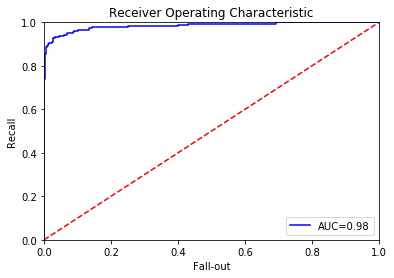

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

predictions = classifier.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

<b>Tuning models with grid-search</b>

- Grid search is a common method for selecting the hyperparameter values that produce the best model.
- Scikit-learn provides with a function GridSearchCV to implement this.
- The arguments it takes include an estimator, a parameter space and a performance measure
- The n_jobs argument specifies the maximum number of concurrent jobs.
- Set n_jobs to '-1' to use all CPU cores

In [7]:
# import all the required libraries/functions
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [10]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])

parameters = {
    'vect__max_df': (0.25, 0.5, 0.75),
    'vect__stop_words': ('english', None),
    'vect__max_features': (2500, 5000, 10000, None),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'vect__norm': ('l1', 'l2'),
    'clf__penalty': ('l1', 'l2'),
    'clf__C': (0.01, 0.1, 1, 10),    
}
df = pd.read_csv("C:\\Users\\anshul\\PycharmProjects\\scikit-learn\\scikit-learn-application\\Mastering-Machine-Learning-with-scikit-learn-Second-Edition-master\\chapter06\\SMSSpamCollection", delimiter='\t', header=None)
X = df[1].values
y = df[0].values

In [16]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)

In [18]:
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 4608 out of 4608 | elapsed: 12.1min finished


NameError: name 'priint' is not defined

In [19]:
print('Best score: ', grid_search.best_score_)

Best score:  0.9827709978463748


In [22]:
print('Best parameter set: \n')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(param_name, ': ', best_parameters[param_name])
    predictions = grid_search.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions))
print('Recall: ', recall_score(y_test, predictions))

Best parameter set: 

clf__C :  10
clf__penalty :  l2
vect__max_df :  0.5
vect__max_features :  2500
vect__ngram_range :  (1, 2)
vect__norm :  l2
vect__stop_words :  None
vect__use_idf :  True
Accuracy:  0.9863603732950467
Precision:  0.9764705882352941
Recall:  0.9171270718232044


# Multi-class Classification
- one-versus-all
- one-versus-the-rest

In [23]:
import pandas as pd
df = pd.read_csv("C:\\Users\\anshul\\PycharmProjects\\scikit-learn\\scikit-learn-application\\Mastering-Machine-Learning-with-scikit-learn-Second-Edition-master\\chapter06\\train.tsv", header=0, delimiter='\t')
print(df.count())

PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64


In [24]:
print(df.head())

   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  


- Sentiment column contains the response variable (y).
- 0 corresponds to negative sentiment
- 1 corresponds to somewhat negative sentiment, and so on.

In [25]:
# examin the Phrase column
print(df['Phrase'].head(10))

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
5    of escapades demonstrating the adage that what...
6                                                   of
7    escapades demonstrating the adage that what is...
8                                            escapades
9    demonstrating the adage that what is good for ...
Name: Phrase, dtype: object


In [26]:
# examin the target class
print(df['Sentiment'].describe())

count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64


In [27]:
print(df['Sentiment'].value_counts())

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


In [33]:
# percentage of each count type
print(df['Sentiment'].value_counts()) 
print((100*df['Sentiment'].value_counts()/df['Sentiment'].count()))

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64
2    50.994489
3    21.098936
1    17.475971
4     5.899013
0     4.531590
Name: Sentiment, dtype: float64


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
df = pd.read_csv("C:\\Users\\anshul\\PycharmProjects\\scikit-learn\\scikit-learn-application\\Mastering-Machine-Learning-with-scikit-learn-Second-Edition-master\\chapter06\\train.tsv", header=0, delimiter='\t')

In [38]:
X, y = df['Phrase'], df['Sentiment'].as_matrix()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# grid_search = main(X_train, y_train)
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])
parameters={    
    'vect__max_df': (0.25, 0.5),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'clf__C': (0.1, 1, 10),   
    
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')

In [42]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__max_df': (0.25, 0.5), 'vect__ngram_range': ((1, 1), (1, 2)), 'vect__use_idf': (True, False), 'clf__C': (0.1, 1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [44]:
print('Best score: ', grid_search.best_score_)
print('Best parameter set: \n')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(param_name, ': ', best_parameters[param_name])
    predictions = grid_search.predict(X_test)
#print('Accuracy: ', accuracy_score(y_test, predictions))
#print('Precision: ', precision_score(y_test, predictions))
#print('Recall: ', recall_score(y_test, predictions))

Best score:  0.6212097911059848
Best parameter set: 

clf__C :  10
vect__max_df :  0.25
vect__ngram_range :  (1, 2)
vect__use_idf :  False


In [45]:
# multi-class classification performance metrics
predictions = grid_search.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions))
print('Classification Report: \n', classification_report(y_test, predictions))

Accuracy:  0.6370370370370371
Confusion Matrix: 
 [[ 1155  1641   597    70     8]
 [  915  6096  5995   529    22]
 [  226  3248 32595  3452   153]
 [   24   413  6730  8209  1278]
 [    3    38   511  2469  1653]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.50      0.33      0.40      3471
          1       0.53      0.45      0.49     13557
          2       0.70      0.82      0.76     39674
          3       0.56      0.49      0.52     16654
          4       0.53      0.35      0.42      4674

avg / total       0.62      0.64      0.62     78030



# Multi-label classification performance metrics

- Multi-label classification performance metrics
    - Hamming Loss
    - Jaccard Similarity

In [46]:
import numpy as np
from sklearn.metrics import hamming_loss, jaccard_similarity_score

# (0-1 1-1 and 0-1 1-1) - same
print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[0.0, 1.0], [1.0, 1.0]])))

0.0


In [47]:
# (0-1 1-1 and 1-1 1-1) - one change
print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [1.0, 1.0]])))

0.25


In [48]:
# (0-1 1-1 and 1-1 0-1) - swapped, 2 changes
print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [0.0, 1.0]])))

0.5


In [50]:
# (0-1 1-1 and 0-1 1-1) - same
print(jaccard_similarity_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[0.0, 1.0], [1.0, 1.0]])))

# (0-1 1-1 and 1-1 1-1) - one change
print(jaccard_similarity_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [1.0, 1.0]])))

# (0-1 1-1 and 1-1 0-1) - swapped, 2 changes
print(jaccard_similarity_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [0.0, 1.0]])))

1.0
0.75
0.5


<b>Generative vs Discriminative Models</b>

# Naive-Bayes with Scikit-learn

In [51]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [52]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=31)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


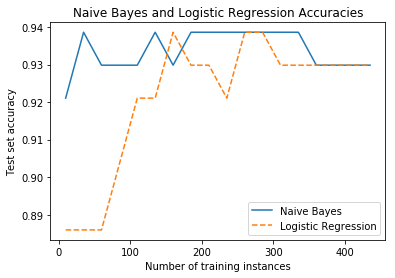

In [54]:
lr = LogisticRegression()
nb = GaussianNB()

lr_scores = []
nb_scores = []

train_sizes = range(10, len(X_train), 25)

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, y_train, train_size=train_size, stratify=y_train, random_state=31)
    nb.fit(X_slice, y_slice)
    nb_scores.append(nb.score(X_test, y_test))
    lr.fit(X_slice, y_slice)
    lr_scores.append(lr.score(X_test, y_test))
    
plt.plot(train_sizes, nb_scores, label='Naive Bayes')
plt.plot(train_sizes, lr_scores, linestyle='--', label='Logistic Regression')
plt.title('Naive Bayes and Logistic Regression Accuracies')
plt.xlabel('Number of training instances')
plt.ylabel('Test set accuracy')
plt.legend()
    

Comparing the performance of Logistic Regression and naive Bayes classifiers on the Pima Indians Diabetes Database

In [66]:
df = pd.read_csv("C:\\Users\\anshul\\PycharmProjects\\scikit-learn\\scikit-learn-application\\Mastering-Machine-Learning-with-scikit-learn-Second-Edition-master\\chapter07\\pima-indians-diabetes.data", header=None)
y = df[8]
# X = df.drop(8, axis='index')
X = df[[0, 1, 2, 3, 4, 5, 6, 7]]

In [67]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: 8, dtype: int64

In [68]:
X.head()

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11)

lr = LogisticRegression()
nb = GaussianNB()
lr_scores = []
nb_scores = []

train_sizes = range(10, len(X_train), 10)
for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, y_train, train_size=train_size, stratify=y_train, random_state=11)
    nb.fit(X_slice, y_slice)
    nb_scores.append(nb.score(X_test, y_test))
    lr.fit(X_slice, y_slice)
    lr_scores.append(lr.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


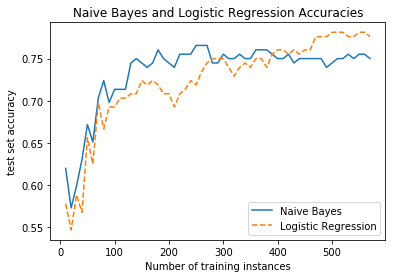

In [71]:
plt.plot(train_sizes, nb_scores, label='Naive Bayes')
plt.plot(train_sizes, lr_scores, linestyle='--', label='Logistic Regression')
plt.title('Naive Bayes and Logistic Regression Accuracies')
plt.xlabel('Number of training instances')
plt.ylabel('test set accuracy')
plt.legend()

# Nonlinear Classification and Regression with Decision Trees

- Decision Trees
Tree-like graphs that model a decision.

- Algorithm to create a Decision Tree:
Iterative Dichotomiser3 (ID3)

In [2]:
# decision trees with scikit-learn
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('//home//anshul//anaconda3//anshul//scikit-learn//scikit-learn-application//Mastering-Machine-Learning-with-scikit-learn-Second-Edition-master//chapter08//ad.data', header=None, low_memory=False)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [4]:
explanatory_variable_columns = set(df.columns.values)
explanatory_variable_columns.remove(len(df.columns.values)-1)
response_variable_column = df[len(df.columns.values)-1]
# the last column describes the classes

In [5]:
y = [1 if e == 'ad.' else 0 for e in response_variable_column]
X = df[list(explanatory_variable_columns)].copy()
X.replace(to_replace=' *?', value=-1, regex=True, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])
parameters = {
    'clf__max_depth': (150, 155, 160),
    'clf__min_samples_split': (2, 3),
    'clf__min_samples_leaf': (1, 2, 3)
}

In [11]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    6.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__max_depth': (150, 155, 160), 'clf__min_samples_split': (2, 3), 'clf__min_samples_leaf': (1, 2, 3)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [13]:
best_parameters = grid_search.best_estimator_.get_params()

In [14]:
print('Best Score: ', grid_search.best_score_)
print('Best Parameters Set: \n')
for param_name in sorted(parameters.keys()):
    print(param_name, best_parameters[param_name])

Best Score:  0.8542865185870128
Best Parameters Set: 

clf__max_depth 150
clf__min_samples_leaf 3
clf__min_samples_split 3


In [15]:
predictions = grid_search.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       692
          1       0.95      0.83      0.88       128

avg / total       0.97      0.97      0.96       820



# From Decision Trees to Random Forest

<b>Bagging aka bootstrap aggregating</b>

In [16]:
# bootstrap resampling - used to create the training data variants
import numpy as np
sample = np.random.randint(low=1, high=100, size=10)
print('Original Sample: ', sample)
print('Sample Mean: ', sample.mean())

Original Sample:  [35 85 44  2 30 18 73 68 25  2]
Sample Mean:  38.2


In [17]:
# bootstrap resample 100 times by resampling with the replacement from the original sample
resamples = [np.random.choice(sample, size=sample.shape) for i in range(100)]
print('Number of bootstrap resamples: ', len(resamples))
print('Example resample: ', resamples[0])

Number of bootstrap resamples:  100
Example resample:  [73 30 35  2 30 44 30  2 35 25]


In [18]:
resample_means = np.array([resample.mean() for resample in resamples])
print('Mean of resamples\' means: ', resample_means.mean())

Mean of resamples' means:  37.35


Bagged decision tree ensembles are known as <b>'random forest'</b>.

<b>Random Forest with scikit-learn</b>

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [20]:
X, y = make_classification(
n_samples=1000, n_features=100, n_informative=20,
    n_clusters_per_class=2, 
    random_state=11
)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [22]:
# using decision tree classifier
clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.73      0.66      0.69       127
          1       0.68      0.75      0.71       123

avg / total       0.71      0.70      0.70       250



In [23]:
# using random forest classifier
clf = RandomForestClassifier(n_estimators=10, random_state=11)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.74      0.83      0.79       127
          1       0.80      0.70      0.75       123

avg / total       0.77      0.77      0.77       250



<b>Boosting</b>
- Family of ensemble methods that are primarily used to reduce the bias of an estimator
- Boosting can be used in classification and regression both
- Most popular boosting algorithm - AdaBoost (adaptive boosting)

<b>Examples of the boosting algoriths implemented via scikit-learn</b>
- AdaBoostClassifier
- AdaBoostRegressor
- GradientBoostingClassifier
- GradientBoostingRegressor

In [24]:
# implementing AdaBoostClassifier
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/home/anshul/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [25]:
X, y = make_classification(
n_samples=1000, n_features=50, n_informative=30,
    n_clusters_per_class=3,
    random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [26]:
clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
print('Decision tree accuracy: ', clf.score(X_test, y_test))

Decision tree accuracy:  0.688


In [28]:
# AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, random_state=11)
clf.fit(X_train, y_train)
## accuracies.append(clf.score(X_test, y_test))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=11)

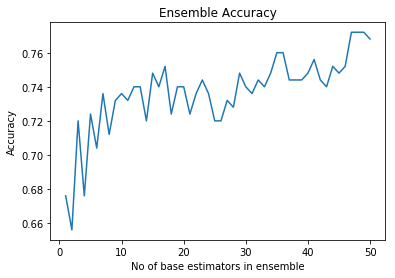

In [29]:
plt.title('Ensemble Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No of base estimators in ensemble')
plt.plot(range(1, 51), [accuracy for accuracy in clf.staged_score(X_test, y_test)])

<b>Stacking</b>
- An approach to create ensembles
- meta-estimator to combine the predictions of the base estimators
- also known as <b>blending</b>

For stacking, the meta-estimator must be trained to use the predictions of the base estimators to predict the value of the response variables.

In [2]:
# Example of stacking
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.base import clone, BaseEstimator, TransformerMixin, ClassifierMixin

In [3]:
class StackingClassifier(BaseEstimator, ClassifierMixin, TransformerMixin):
    
    def __init__(self, classifiers):
        self.classifiers = classifiers
        self.meta_classifier = DecisionTreeClassifier()
        
    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
        self.meta_classifier.fit(self._get_meta_features(X), y)
        return self
    
    def _get_meta_features(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers])
        return np.concatenate(probas, axis=1)
    
    def predict(self, X):
        return self.meta_classifier.predict(self._get_meta_features(X))
    
    def predict_proba(self, X):
        return self.meta_classifier.predict_proba(self._get_meta_features(X))

In [4]:
X, y = make_classification(
n_samples=1000, n_features=50, n_informative=30,
    n_clusters_per_class=3,
    random_state=11)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

# applying logistic regression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
print('Logistic Regression Accuracy: ', clf_lr.score(X_test, y_test))

# applying KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
print('KNN Accuracy: ', clf_knn.score(X_test, y_test))

Logistic Regression Accuracy:  0.816
KNN Accuracy:  0.836


In [6]:
base_classifiers = [clf_lr, clf_knn]
clf_stack = StackingClassifier(base_classifiers)
clf_stack.fit(X_train, y_train)
print('Stacking Classifier Accuracy: ', clf_stack.score(X_test, y_test))

Stacking Classifier Accuracy:  0.852


# The Perceptron

- A perceptron is anologus to a neuron - accepting one or more inputs, process them and return an output.
- A perceptron is capable of online learning. 
- Online learning is important and useful for learning from training sets that are too large to be represented in the memory.

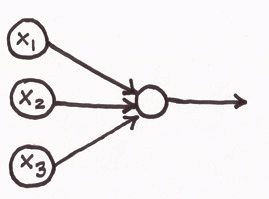

<b>Activation Function</b>
- The perceptron classifies instances by processing a linear combination of the features and the model parameters using an activation function.
- One example of the activation function is the sigmoid function

In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

In [11]:
# Execution failed as the database download did not complete

categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
# Downloading 20news dataset. This may take a few minutes.
# Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroup_train.data)
X_test = vectorizer.fit_transform(newsgroup_test.data)

clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)
predictions = clf.predict(X_test)

print(classification_report(newsgroups_test.target, predictions))

# Using SVM for classifying characters using scikit-learn

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import matplotlib.cm as cm

# mnist = fetch_mldata('MNIST original', data_home='data/mnist')


# Training a multi-layer perceptron to approximate XOR

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

y = [0, 1, 1, 0]
X = [[0, 0], [1, 0], [0, 1], [1, 1]]

clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=20, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [3]:
predictions = clf.predict(X)
print('Accuracy: ', clf.score(X, y))
for i, p in enumerate(predictions):
    print('Actual: ', y[i], 'Predicted: ', p)

Accuracy:  1.0
Actual:  0 Predicted:  0
Actual:  1 Predicted:  1
Actual:  1 Predicted:  1
Actual:  0 Predicted:  0


In [6]:
print('\nWeights connecting the input and hidden layers: \n', clf.coefs_[0])
print('\nHidden layer bias weights: \n', clf.intercepts_[0])
print('\nWeights connecting the hidden and output laters: \n', clf.coefs_[1])
print('\nOutput layer bias weights: \n', clf.intercepts_[1])


Weights connecting the input and hidden layers: 
 [[6.11803971 6.35656367]
 [5.79147849 6.14551907]]

Hidden layer bias weights: 
 [-9.38637902 -2.77751785]

Weights connecting the hidden and output laters: 
 [[-14.95481689]
 [ 14.53080966]]

Output layer bias weights: 
 [-7.22845304]


# Training a multi-layer perceptron to classify handwritten digits

In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

In [8]:
if __name__ == '__main__':
    digits = load_digits()
    X = digits.data
    y = digits.target
    pipeline = Pipeline([
        ('ss', StandardScaler()),
        ('mlp', MLPClassifier(hidden_layer_sizes=(150, 100),
                             alpha=0.1, max_iter=300, random_state=20))
    ])
    print(cross_val_score(pipeline, X, y, n_jobs=-1))

[0.95348837 0.96160267 0.90604027]


# K-means Clustering (Unsupervised Learning)
- Selecting K with elbow method

In [9]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

c1x = np.random.uniform(0.5, 1.5, (1, 10))
c1y = np.random.uniform(0.5, 1.5, (1, 10))

c2x = np.random.uniform(3.5, 4.5, (1, 10))
c2y = np.random.uniform(3.5, 4.5, (1, 10))

In [10]:
x = np.hstack((c1x, c2x))
y = np.hstack((c1y, c2y))

X = np.vstack((x, y)).T

In [11]:
K = range(1, 10)
meanDispersions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meanDispersions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

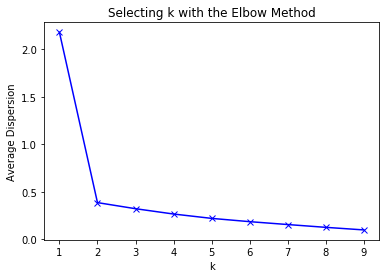

In [13]:
plt.plot(K, meanDispersions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()

<b>Measuring the performance of the unsupervised clustering model - k-means using <u>'silhouette coefficient'</u></b>

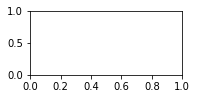

In [49]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

plt.subplot(3, 2, 1)
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(pd.DataFrame(list(zip(x1, x2))))

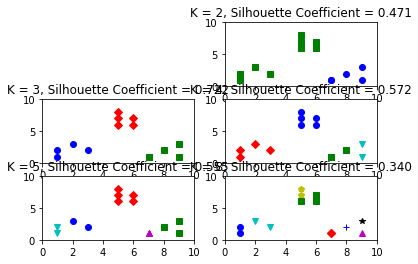

In [58]:
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 8]
subplot_counter = 1

for t in tests:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
        
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.title('K = %s, Silhouette Coefficient = %0.3f' %(t, metrics.silhouette_score(X, kmeans_model.labels_, metric='euclidean')))

plt.show()
    

    